# Project: Trends in TMDb Movie Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>The dataset contains information about 10,000 movies from TMDb, a popular movie database that users can edit. 

> Columns in the dataset are listed below. A short description has been provided for those that may need more explanation:
>- id (movie id) 
>- imdb_id (movie id in the IMDB database)
>- popularity (how popular a movie is; it is based on a variety of factors such as number of votes and views for the day)
>- budget (money budgeted for the movie)
>- revenue (revenue generated by the movie)
>- original_title (movie title)
>- cast (actors/actresses in the movie)
>-homepage (movie website)
>-director (movie director)
>-tagline
>-keywords
>-overview (short description of the movie)
>-runtime (how long the movie is)
>-genres
>-production_companies (companies that were involved in the movie production)
>-release_date
>-vote_count (how many user votes that movie received)
>-vote_average (average of votes received)
>-release_year
>-budget_adj (budget adjusted for trends over time ie inflation)
>-revenue_adj (revenue adjusted for trends over time ie inflation)

> Questions I aim to answer with the dataset are:
>- Do popularity ratings increase over time?
>- What months do movies tend to be released?
>- Which 10 production companies earned the most revenue?
>- How many movies made revenue above the third quartile?
>- What are the top 10 movies of all time?
>- Is higher budget associated with higher revenue?

In [1]:
#import statements for packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> For data wrangling, we typically gather, assess, and clean the data to prepare it for analyzing.

> Steps:
> - Loading the dataset
> - Exploring the dataset
> - Checking for null values
> - Checking for duplicate values
> - Trimming and cleaning data so we only have columns needed for analysis



## Loading the Dataset

First, I loaded in the TMDB movies dataset for analysis. I viewed the first few rows of the dataset to see that it loaded correctly and get a general sense of what rows and columns the dataset included.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Exploring Data
I continued exploring the dataset. I figured out how many rows and columns the dataset had, as well as some general statistics. Histograms helped visualize general dataset trends.

In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


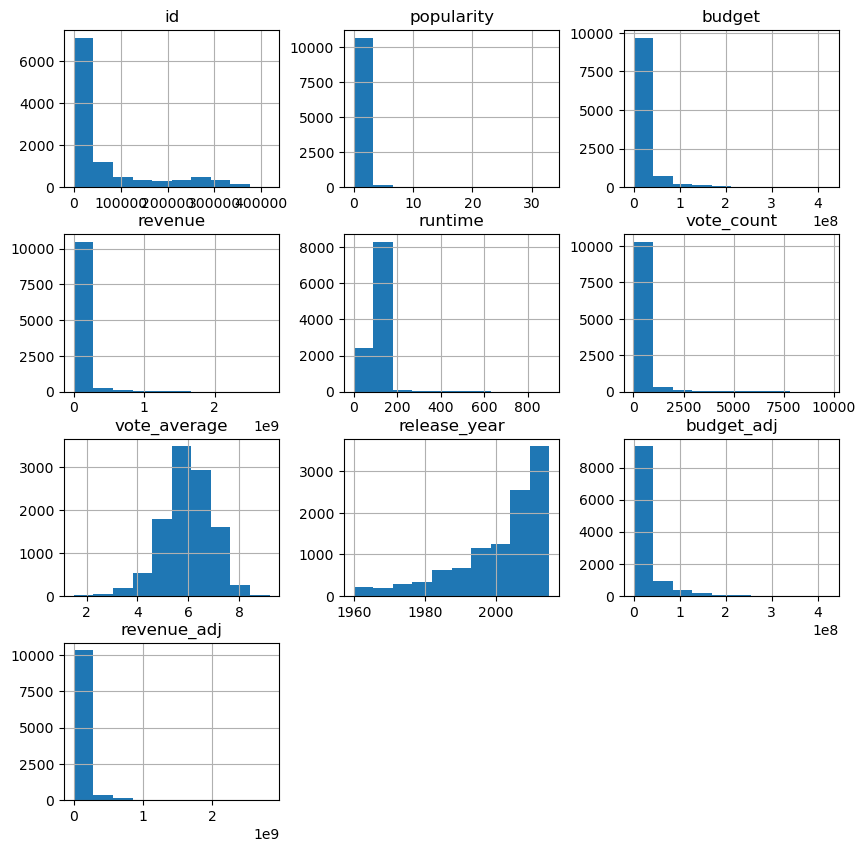

In [5]:
df.hist(figsize = (10,10));

<a id='wrangling'></a>
## Checking for Null Values
I got a sense of how many columns had null values. Later in the report, I will determine the exact number of null values for each column and decide how to handle them. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='wrangling'></a>
## Checking for Duplicate Data
I checked for duplicate values and took a look at the duplicate row. 

In [7]:
sum(df.duplicated())

1

In [8]:
df[df.duplicated()]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


<a id='wrangling'></a>
### General Properties
- The dataset has 10866 rows and 21 columns
- 10 columns have null values
- There is 1 duplicate value

Some observations from the dataset: 
- Average popularity seems to be 0.636 which is far from the max popularity of 32.99. 
- Movies have an average of around 217 votes and an approximate average user vote of 6. 
- Most adjusted budget for movies fall below 1e8 range, along with adjusted revenue. 
- Most movies are around the 1 to 2 hour range.




<a id='wrangling'></a>
Now that we know the dataset's general properties we can begin the cleaning process. 





### Data Cleaning 

To make the dataset easier to manipulate and view, I dropped the columns that wouldn't be used for analysis and kept only the columns below:
- popularity
- original_title
- runtime
- genres
- production_companies
- release_year
- release_date
- budget_adj
- revenue_adj

I used adjusted budget and revenue instead of columns budget and revenue because it is a better representation of the monetary value in regard to the times. 


Because there are null values for multiple columns, I checked how many null values of each column there were. If the column does not have a significant amount of null values, we can probably drop them. However, for some of the columns, a major amount of the dataset has null values. I considered trying to replace some of the missing values of columns such as production companies by researching online, but since it is best not to mess with data in a dataset provided, I decided to replace the null values with the value of 'Unavailable'. Additionally, since there is only one duplicate column, I decided to drop that from the dataset as well. 



#### Data Cleaning Code
-------------------------------------------
Drop columns not needed for our analysis

In [9]:
df.drop(['id', 'imdb_id', 'homepage', 'cast', 'tagline', 'overview', 'keywords', 'revenue', 'budget', 'director', 'vote_count', 'vote_average'], axis = 1, inplace = True)

Check to see if columns were dropped

In [10]:
df.head()


,popularity,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09


Check to see how many null values are in the dataset


In [11]:
df.isna().sum() 

popularity                 0
original_title             0
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Even though some of the columns have very small amounts of null values (ie 23 for genres), other columns such as production_companies have a bigger number of null values (1030). Would this be considered a significant amount? I decided to see how much the proportion of the null count would be in comparison to the overall data count. 

In [12]:
production_na = df.production_companies.isna().sum()
production_na/10865

0.09479981592268753

The null values of production companies make up almost 10% of the dataset!  Since I thought that was a significant amount, I decided not to drop the values. Instead, I decided to replace them with the value of 'Unavailable.'

In [13]:
df.fillna(value = 'Unavailable', inplace = True)

Quick check to see if null values were replaced.

In [14]:
df.isna().sum() 

popularity              0
original_title          0
runtime                 0
genres                  0
production_companies    0
release_date            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

FInally, the last step for our data cleaning I took was to drop duplicate values in the dataset.

In [15]:
df.drop_duplicates(inplace=True)


<a id='eda'></a>
## Exploratory Data Analysis


## Do popularity ratings increase over time?

In [16]:
#group max popularity by year movie is released
df_popularity = df.groupby('release_year').popularity.max()

#first few rows of max popularity of movies by year
df_popularity.head()

release_year
1960    2.610362
1961    2.631987
1962    3.170651
1963    2.508235
1964    3.153791
Name: popularity, dtype: float64

In [17]:
# Function to plot graphs
# Data = data to plot, xlabel = label for x-axis, ylabel = label for y-axis
# kwargs = additional arguments depending on graph
# examples include kind of graph, data for the x-axis, color, etc
def plot_graph(data, xlabel, ylabel, title, kwargs):

    data.plot(figsize = (8,8), **kwargs)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

,popularity
release_year,
1960,2.610362
1961,2.631987
1962,3.170651
1963,2.508235
1964,3.153791
1965,1.910465
1966,1.227582
1967,2.550704
1968,3.309196


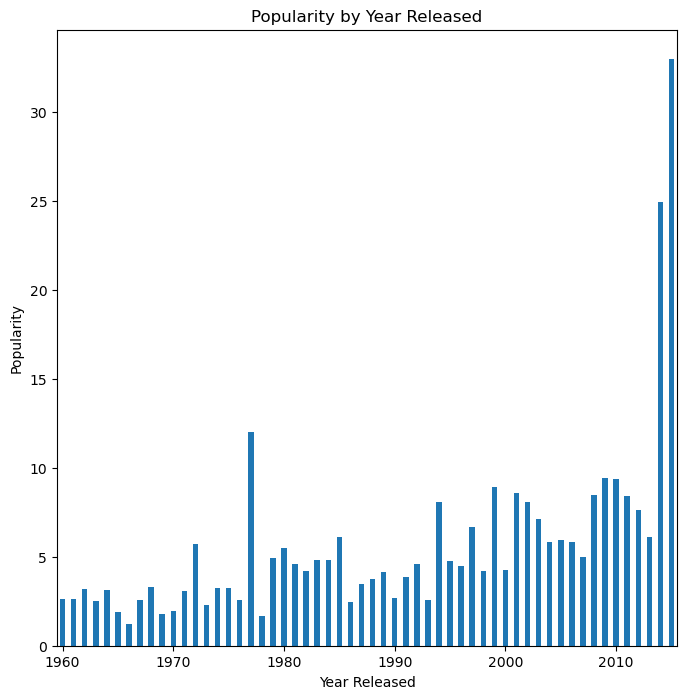

In [19]:
#Distribution of popularity every year
#Plot bar graph
plot_graph(df_popularity, 'Year Released', 'Popularity', 'Popularity by Year Released', 
          {'kind':'bar', 'rot':0, 'x':'df_popularity.index', 'y':'df_popularity'})

#create new tick marks for easier viewing
pos,labs = plt.xticks()
plt.xticks(pos[::10],labs[::10]);

#descriptive statistics
#max popularity of each year
df.groupby('release_year')[['popularity']].max()

### Conclusions
The most popular movie was made in 2015. The general trend is that movies' popularity ratings increase over time.

## What months do movies tend to be released?

In [20]:
#make the year in the original column into its 4 digit format
df.release_date = df.release_date.str[:-2] + df.release_year.astype(str)

#convert from str to datetime
df.release_date = pd.to_datetime(df.release_date)

#get month name
df['month_name'] = df['release_date'].dt.month_name()

In [21]:
#import calendar module to use for month ordering
import calendar
day_order = [day for day in calendar.day_name]
month_order = [month for month in calendar.month_name][1:]

In [22]:
#change type to category
df.month_name = pd.Categorical(df.month_name, ordered = True, categories = month_order)

#check that change was implemented
print(df.month_name.dtype)

category


In [23]:
#I wanted to order it by months to make it easier to see possible changes in seasons or times of the year
df_movies_month = df.groupby('month_name').size()

#show number of movies released each month
df_movies_month

month_name
January       919
February      691
March         822
April         797
May           809
June          827
July          799
August        918
September    1331
October      1153
November      814
December      985
dtype: int64

Text(0.5, 1.0, 'Proportion of Movies released by Month')

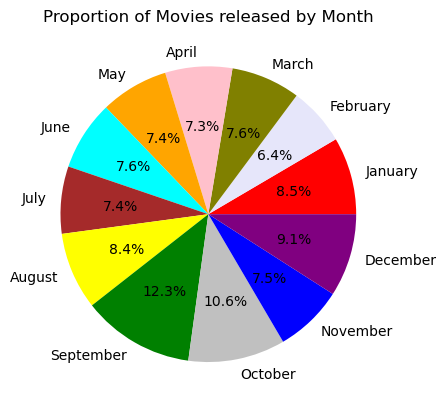

In [24]:
#Plot proportion of movies released by month
plt.pie(df_movies_month, labels = df_movies_month.index,  colors = ['red', 'lavender', 'olive', 'pink', 'orange', 'cyan', 'brown','yellow', 'green', 'silver', 'blue', 'purple'] , autopct = '%1.1f%%')
plt.title('Proportion of Movies released by Month')


### Conclusions
The largest amount of movies were released in September, followed by October, then December. Interestingly, it appears that from August to January, the general trend is that more movies are released during this time (disregarding November) compared to the rest of the year. The least amount of movies were released in February at 6.4%. Most other months were pretty close in number of movies released, which may show that there isn't too much of a preference in the time of year when movies are released.

## Which 10 production companies earned the most revenue?

In [25]:
#Separating the production companies into different rows for analysis
#Creating a new dataframe for it so it doesn't affect other analysis
df_production = df.copy()
df_production.production_companies = df_production.production_companies.str.split('|', n=-1, expand=False)
df_production = df_production.explode('production_companies')
df_production

,popularity,original_title,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,month_name
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015-06-09,2015,1.379999e+08,1.392446e+09,June
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,2015-06-09,2015,1.379999e+08,1.392446e+09,June
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,2015-06-09,2015,1.379999e+08,1.392446e+09,June
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,2015-06-09,2015,1.379999e+08,1.392446e+09,June
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Dentsu,2015-06-09,2015,1.379999e+08,1.392446e+09,June
...,...,...,...,...,...,...,...,...,...,...
10862,0.065543,Grand Prix,176,Action|Adventure|Drama,Joel Productions,1966-12-21,1966,0.000000e+00,0.000000e+00,December
10862,0.065543,Grand Prix,176,Action|Adventure|Drama,Douglas & Lewis Productions,1966-12-21,1966,0.000000e+00,0.000000e+00,December
10863,0.065141,Beregis Avtomobilya,94,Mystery|Comedy,Mosfilm,1966-01-01,1966,0.000000e+00,0.000000e+00,January
10864,0.064317,"What's Up, Tiger Lily?",80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,1966,0.000000e+00,0.000000e+00,November


In [26]:
#Get average adjusted revenue of each production company
df_production_revenue = pd.DataFrame(df_production.groupby(['production_companies'],sort=False)['revenue_adj'].mean())

#get top 10 companies with largest average adjusted revenue
df_production_topten = df_production_revenue.revenue_adj.nlargest(10)


,revenue_adj
production_companies,
Hoya Productions,2.167325e+09
Truenorth Productions,1.902723e+09
Alfran Productions,1.277914e+09
Julia Phillips and Michael Phillips Productions,1.092965e+09
Second Mate Productions,1.081672e+09
MIRACLE Productions GmbH & Co. KG,1.062776e+09
Disney Enterprises,1.024887e+09
Patalex IV Productions Limited,1.000353e+09
Lightstorm Entertainment,9.899351e+08


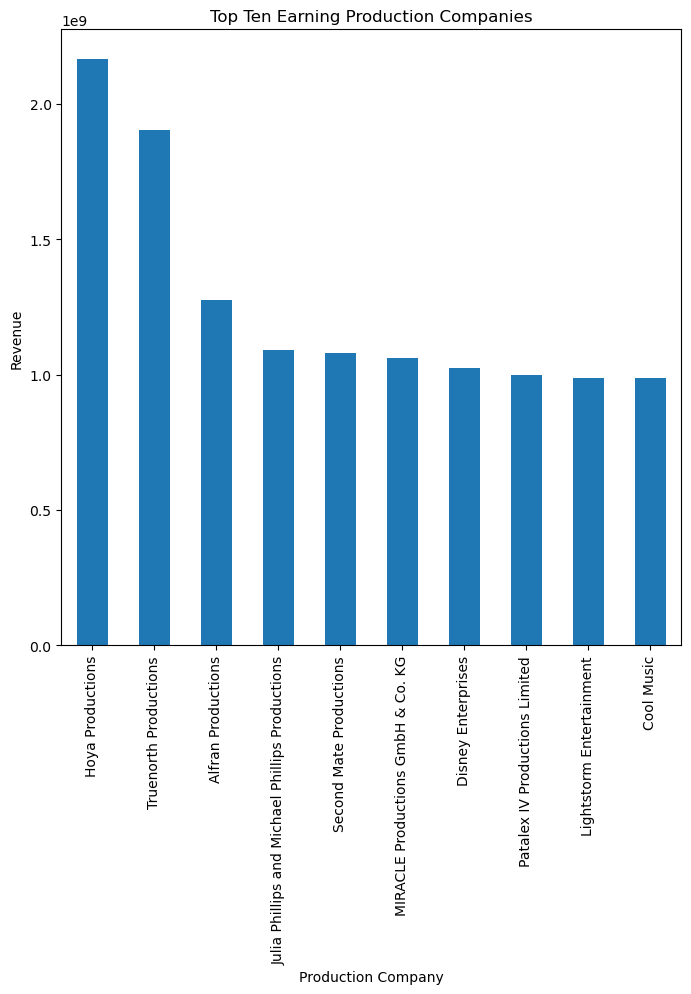

In [28]:
#Plot top ten production companies by revenue in bar graph
plot_graph(df_production_topten, 'Production Company', 'Revenue', 'Top Ten Earning Production Companies',  
          {'kind':'bar', 'x':'production_companies', 'y':'revenue_adj'})

#descriptive statistics for the graph (top ten movies and their adjusted revenue)
df_production_topten.to_frame()

### Conclusions
The top 10 production companies with the greatest average revenue are:
- 1) Hoya Productions
- 2) Truenorth Productions
- 3) Alfran Productions
- 4) Julia Phillips and Michael Phillips Productions
- 5) Second Mate Productions
- 6) MIRACLE Productions GmbH & Co. KG
- 7) Disney Enterprises
- 8) Patalex IV Productions Limited
- 9) Lightstorm Entertainment
- 10) Cool Music

Hoya Productions and Truenorth Productions had a big disparity in revenue compared to the rest of the top 10 production companies. Hoya Productions(the top earner) made around 1 billion more in revenue compared to Cool Music(10th earner). Other than the top 2 companies (Hoya Productions and Truenorth Productions), most of the other production companies made around the same amount of revenue. Interestingly enough, household names that I would personally recognize such as Dreamworks Animation or Warner Bros did not make the top 10. Perhaps something to look into for future analyis would be whether the top 10 production companies changed over time and if a certain factors, for example, a certain movie, attributed to the big difference in revenue between the top 10 companies. 



## What are the top 10 movies of all time?

In [29]:
#find top 10 movies according to popularity
df_popularity = df[['original_title','popularity']]
df_topten_movies = df_popularity.nlargest(10, 'popularity')

#### How much does these top 10 movies differ by popularity?

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


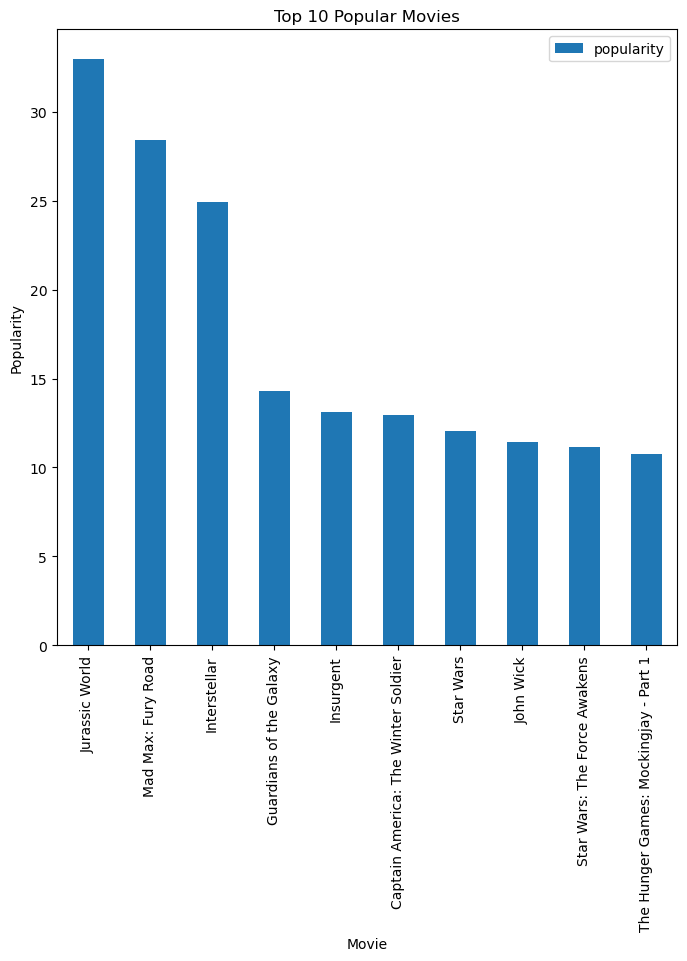

In [31]:
#Plot top ten movies by popularity in a bar graph
plot_graph(df_topten_movies, 'Movie', 'Popularity', 'Top 10 Popular Movies',  
          {'kind':'bar', 'x':'original_title', 'y':'popularity'})

#descriptive statistcis
#top ten movies listed by popularity
df_topten_movies

### Conclusions
The top 10 movies by popularity are:
- 1) Jurassic World
- 2) Mad Max: Fury Road
- 3) Interstellar
- 4) Guardians of the Galaxy
- 5) Insurgent
- 6) Captain Amerida: The Winter Soldier
- 7) Star Wars
- 8) Jon Wick
- 9) Star Wars: The Force Awakens
- 10) The Hunger Games: Mockingjay - Part 1

Interestingly enough the top 3 movies (Jurassic World, Mad Max: Fury Road, and Interstellar) have quite a jump in popularity compared to the other 7. Their popularity ranges from 25 to 33, whereas the other 7 range from around 10 to 15. That's more than a 10 point difference in popularity!

## How many movies made revenue above or equal to the third quartile?

In [32]:
#Get descriptive statistics for adjusted revenue and find third quartile value for adjusted revenue
pd.DataFrame(df.revenue_adj.describe())

,revenue_adj
count,1.086500e+04
mean,5.136900e+07
std,1.446383e+08
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,3.370173e+07
max,2.827124e+09


In [33]:
df_high_revenue = df.query('revenue_adj >= 3.370173e+07')

#I just used original title to count the number of movies in the range above 75% 
df_high_revenue.original_title.count()


2716

After looking at this, I was also curious as to the count and distribution of the movies that were below the third quartile and how it might differ from the distribution of all movies, along with the movies above the third quartile. 

To look at the distribution, I plotted all three scenarios in histograms. 

In [34]:
#Number of movies that are below the third quartile
df_low_revenue = df.query('revenue_adj > 3.370173e+07' and 'revenue_adj>0')
df_low_revenue.original_title.count()

4849

,revenue_adj
count,1.086500e+04
mean,5.136900e+07
std,1.446383e+08
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,3.370173e+07
max,2.827124e+09


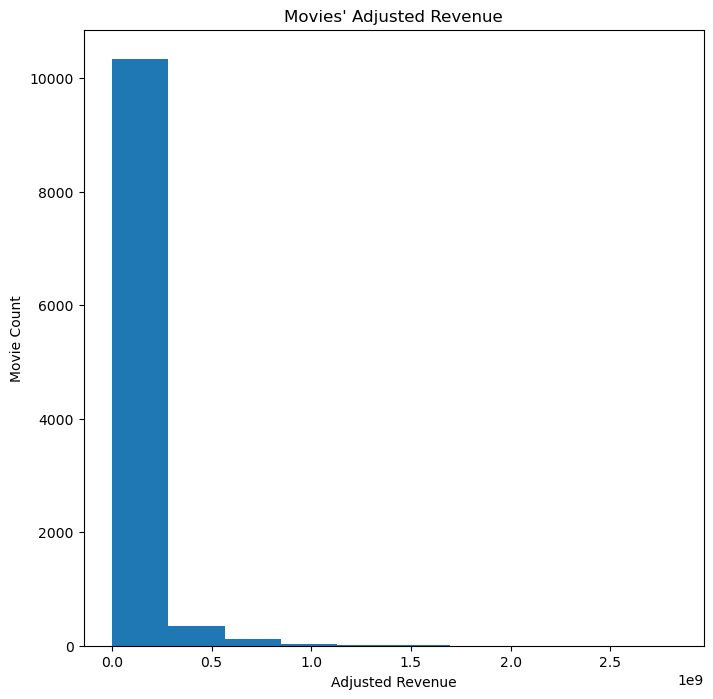

In [35]:
#Distribution of movies and their adjusted revenue
#Plot histogram
plot_graph(df.revenue_adj, 'Adjusted Revenue', 'Movie Count', "Movies' Adjusted Revenue",  
          {'kind':'hist'})

#descriptive statistics of adjusted revenue for all movies
pd.DataFrame(df.revenue_adj.describe())

,revenue_adj
count,4.849000e+03
mean,1.151009e+08
std,1.988557e+08
min,2.370705e+00
25%,1.046585e+07
50%,4.395666e+07
75%,1.316482e+08
max,2.827124e+09


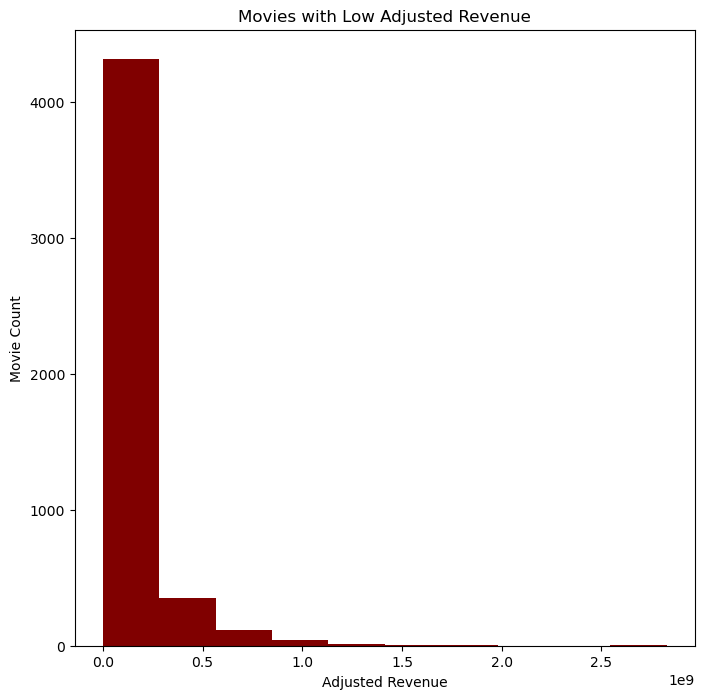

In [37]:
#Distribution of movies and their adjusted revenue (below third quartile)
#Plot histogram
plot_graph(df_low_revenue.revenue_adj, 'Adjusted Revenue', 'Movie Count', "Movies with Low Adjusted Revenue", 
          {'kind':'hist', 'color':'maroon'})

#descriptive statistics of adjusted revenue for low revenue movies
pd.DataFrame(df_low_revenue.revenue_adj).describe()

,revenue_adj
count,2.716000e+03
mean,1.969987e+08
std,2.351033e+08
min,3.373181e+07
25%,6.379738e+07
50%,1.125519e+08
75%,2.298801e+08
max,2.827124e+09


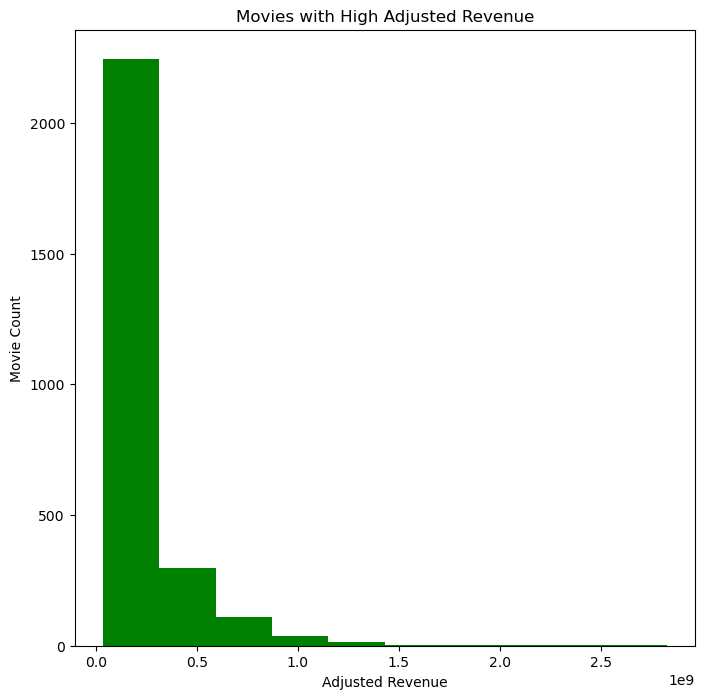

In [38]:
#Distribution of movies and their adjusted revenue (above third quartile)
#Plot histogram
plot_graph(df_high_revenue.revenue_adj, 'Adjusted Revenue', 'Movie Count', 'Movies with High Adjusted Revenue',
          {'kind':'hist', 'color':'green'})

#descriptive statistics of adjusted revenue for high revenue movies
pd.DataFrame(df_high_revenue.revenue_adj).describe()

### Conclusions
2716 movies made above(or equal to) the third quartile of adjusted revenue(3.370173e+07). Interestingly enough, the graphs for movies making above (or equal to) the third quartile of adjusted revenue, below the third quartile, and all movies have very similar histograms. Other than the number of movies, the distribution of adjusted revenue appears the same. This can be attributed to most movies making below 0.25e9 of adjusted revenue with a very small amount making above that. Many movies made $0 as well. The histograms are all positively skewed/skewed to the right, which indicates that the average adjusted revenue is greater than what most adjusted revenue for the movies are (the mode).

## Is higher budget associated with higher revenue?

Correlation values: PearsonRResult(statistic=0.6466266122347973, pvalue=0.0)


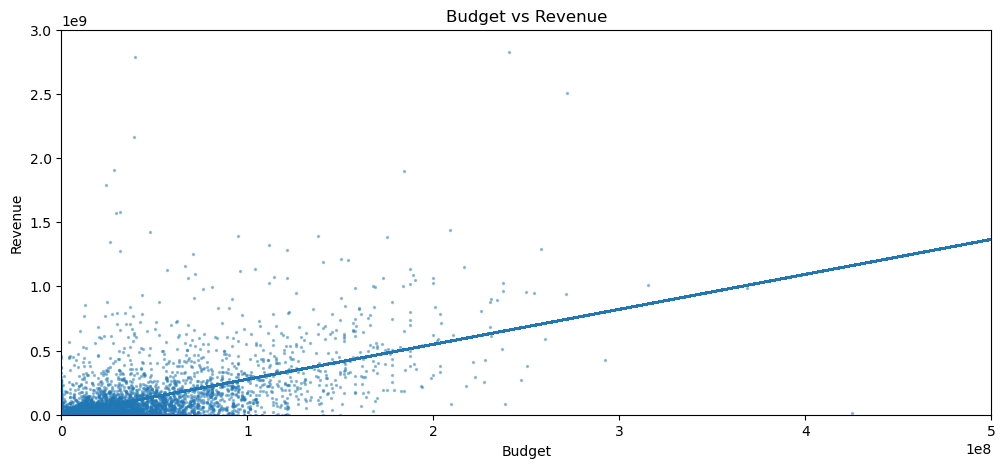

In [39]:
import statsmodels.api as sm
import scipy

#did not use polyfit model due to regression model not fitting as well
model = sm.OLS(df.revenue_adj, sm.add_constant(df.budget_adj))
p = model.fit().params
               
#graph scatter plot
df_rev = df.plot(x='budget_adj', y= 'revenue_adj', kind = 'scatter', s = 2, alpha = 0.4, figsize = (12,5))
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue');

#create sequence of numbers for regression line x-values
x = df.revenue_adj

#plot regression line
df_rev.plot(x, p.const + p.budget_adj* x)

#set it so that it only shows values within the ranges specified
df_rev.set_xlim([-100,500000000])
df_rev.set_ylim([-100,3000000000])

#show correlation values
print("Correlation values:",scipy.stats.pearsonr(df.budget_adj, df.revenue_adj))

### Conclusions
There is a very loose positive correlation between budget and revenue. Since the Pearson correlation value is 0.6, this indicates a strong correlation between budget and revenue. However, since the p-value is <0.5, the result is insignificant. Higher budget seems to be associated with higher revenue, but without further analysis, it's impossible to tell if there is causation between budget and revenue. 

## Summary


### Limitations
There are 10866 samples in the dataset and 12 columns. To determine, if 10866 is considered a small amount of movie releases, I conducted some external research. According to Statista, the number of movies released just from 2000 - 2015 is almost 10,000 already for just 15 years. Even though 10866 samples seems like a lot of data, it is quite small for a time period of 55 years. For it to be more representative, the sample set should be bigger. On another note, the dataset only runs from 1960 to 2015. Given that it is now nearing the end of 2022, the dataset is definitely missing a few years of recent data. These missing years of data could definitely skew our analysis. For example, having the additional information of those years would allow us to better visualize the popularity trend of movies over time; it could also affect the top 10 movies of all time. 

In the beginning, when we looked at null values, there was quite a significant number of them, especially for certain categories like production companies (close to 10%). Because of this, the results of the analysis may be biased toward sample values and misrepresentative. For example, if the production companies of the missing 1030 values was the company Truenorth Productions, that could have made Truenorth Productions the top production company in terms of revenue, instead of Hoya Productions. Although they weren't considered as null values, there were also 0 values in adjusted revenue and budget that may have skewed results. Since I was unsure if the adjusted budget and revenue values were actually 0 (which could be possible), I left them in the data when analyzing. Another way I could have handled it was filling the 0 values with the mean, but again, I was unsure if those values were null or actually 0. Even if I had filled it with the mean, this would have affected the result because the mean is not always the most accurate representation of the data. 

Although we compared several categories, it is important to run statistical tests in order to determine whether or not the result is significant or not.

### Summary Analysis

Generally, movies have increased in popularity over time, with the most popular movie being made in 2015 (the latest sample in the dataset). This is interesting because it raises further questions. Are the recent movies more popular because people in the past used to watch less movies in general? What factors influence the popularity rating the most for old vs new movies?


The greatest amount of movies were released in September (12.3%), followed by October(10.6%), and December(9.1%). It appears that more movies are released at the end of the year, but more investigation is needed to see if this small uptick in movie releases at the end of the year is significant.

The top 10 production companies are: 
- 1) Hoya Productions
- 2) Truenorth Productions
- 3) Alfran Productions
- 4) Julia Phillips and Michael Phillips Productions
- 5) Second Mate Productions
- 6) MIRACLE Productions GmbH & Co. KG
- 7) Disney Enterprises
- 8) Patalex IV Productions Limited
- 9) Lightstorm Entertainment
- 10) Cool Music

Most of these companies earned around 1 billion, while top earner Hoya Productions earned 2 billion. 


The top 10 movies of all time with their popularity listed are:
- 1) Jurassic World (33)
- 2) Mad Max: Fury Road (28.4)
- 3) Interstellar (24.9)
- 4) Guardians of the Galaxy (14.3)
- 5) Insurgent (13.1)
- 6) Captain America: The Winter Soldier (13)
- 7) Star Wars (12.0)
- 8) Jon Wick (11.4)
- 9) Star Wars: The Force Awakens (11.2)
- 10) The Hunger Games: Mockingjay - Part 1 (10.7)

2716 movies made above or equal to the third quartile of revenue, while 4849 made below. Most movies made below 0.25e9 of revenue. 

Higher budget seems associated with higher revenue. It has a Pearson value of 0.65, indicating budget and revenue have a strong positive correlation, meaning when budget increases so does revenue. However, even though the Pearson value is strong, the p-value is <0.5, meaning that the result is insignificant. This means that we can not conclude that higher budget causes higher revenue. 